In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

f, d, D, z, kx = symbols('f,d,D,Z, K_x')
z = symbols('Z')
Delta = Symbol("Delta")
eq_right = Delta * z
eq_left = Abs(1/d-1/(d+Delta*d))*f*D*kx
Eq(eq_right, eq_left)

Eq(Delta*Z, D*K_x*f*Abs(1/(Delta*d + d) - 1/d))

(2048,)
[3.36009555e+00 1.34403822e+00 7.46687899e-01 ... 3.20600378e-06
                 3.20287445e-06 3.19974969e-06]                 


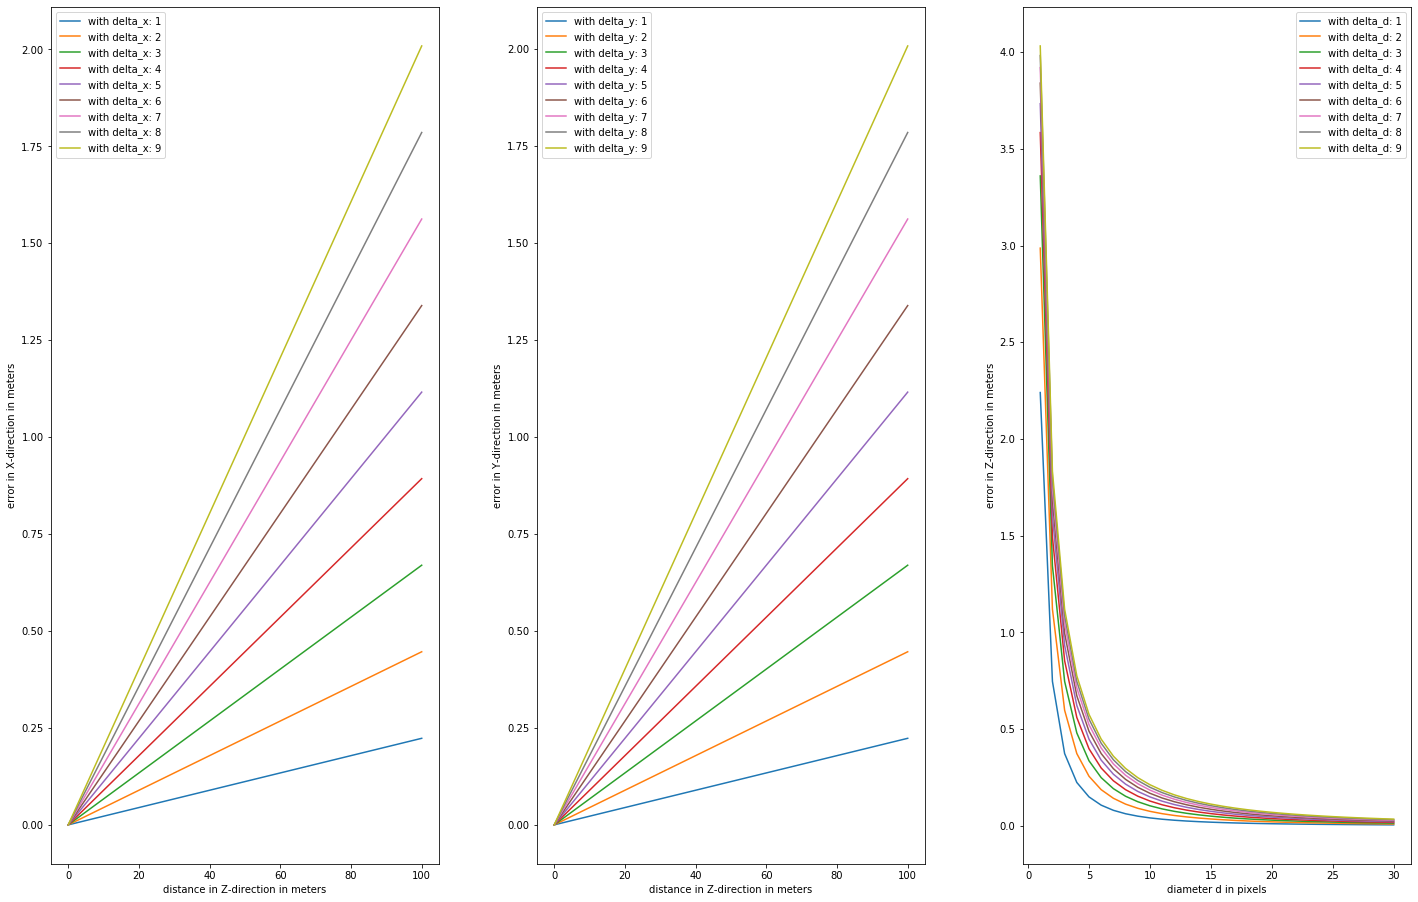

In [90]:
# intrinsics: [1137.952358814274, 1139.2455706836256, 1040.2907098789112, 764.4019425366827]
# resolution: [2048, 1536]
# assuming that first entry of intrinsics is the kx parameter [pixels/inches]

# error for given measured diameter d on image plane in meters
def error_function(d, delta_d):
    delta_Z = D*f*kx*abs(1/(d+delta_d) - 1/d)*10**(-3) # factor at the end converts it to meters from cm
    return delta_Z

kx = 1137.952358814274/2.54   # to turn [pixels/inches] to [pixels/cm]
ky = 1139.2455706836256/2.54  # to turn [pixels/inches] to [pixels/cm]
num_of_samples = 2048
d_d = 3
f = 1
D = 10
# d is diameter of ball in pixels (only integer numbers)
d = np.linspace(1, 2048, num_of_samples, endpoint=True)
delta_Z = error_function(d, d_d)

print(delta_Z.shape)

pprint(delta_Z)

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(h=14, w=21)
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95,
                        top=0.9, wspace=0.25, hspace=0.25)

distance = np.linspace(0,100, num_of_samples, endpoint=True) # different distances (camera frame) to scale x_error and y_error
# delta_x is in pixels
for delta_x in range(1,10):
    delta_X = distance*delta_x/(kx*f)
    ax[0].plot(distance, delta_X, label='with delta_x: {}'.format(delta_x))

for delta_y in range(1,10):
    delta_Y = distance*delta_y/(ky*f)
    ax[1].plot(distance, delta_Y, label='with delta_y: {}'.format(delta_y))
    
for delta_d in range(1,10):
    delta_Z = error_function(d[:30], delta_d)
    ax[2].plot(d[:30], delta_Z, label='with delta_d: {}'.format(delta_d))


ax[0].set_xlabel('distance in Z-direction in meters')
ax[0].set_ylabel('error in X-direction in meters')
ax[0].legend()    
ax[1].set_xlabel('distance in Z-direction in meters')
ax[1].set_ylabel('error in Y-direction in meters')
ax[1].legend()
ax[2].set_xlabel('diameter d in pixels')
ax[2].set_ylabel('error in Z-direction in meters')
ax[2].legend()
plt.show()
